# EDA and Model Testing


This notebook takes a look at the data from Movielens data set and runs exploratory data analysis as well as trying out different models to fit the data set to optimize the best model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, NormalPredictor
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
from surprise import accuracy

### Looking at the datasets provided by MovieLens

In [2]:
movies_df = pd.read_csv('movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_df = pd.read_csv('ratings.csv')
ratings_df.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [4]:
ratings_df.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [5]:
ratings_df = ratings_df.drop(columns='timestamp')

In [6]:
links_df = pd.read_csv('links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
tags_df = pd.read_csv('tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [8]:
len(ratings_df)

100836

In [9]:
movie_ratings_df = pd.merge(ratings_df, movies_df, how='inner', on='movieId')
movie_ratings_df.head(30)

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [10]:
len(movie_ratings_df)

100836

In [11]:
movie_ratings_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [12]:
movie_ratings_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [13]:
ratings = pd.DataFrame(movie_ratings_df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [14]:
ratings['num of ratings'] = pd.DataFrame(movie_ratings_df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [15]:
ratings.describe()

,rating,num of ratings
count,9719.000000,9719.000000
mean,3.262388,10.375141
std,0.870004,22.406220
min,0.500000,1.000000
25%,2.800000,1.000000
50%,3.416667,3.000000
75%,3.910357,9.000000
max,5.000000,329.000000


In [16]:
# Adding columns to the ratings dataframe with the movie's genre
print(movies_df.head())
ratings.head()

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [17]:
titles_ratings = pd.merge(ratings, movies_df, on='title', how='left')
titles_ratings.describe()

,rating,num of ratings,movieId
count,9724.000000,9724.000000,9724.000000
mean,3.262513,10.380708,42245.024373
std,0.869828,22.405711,52191.137320
min,0.500000,1.000000,1.000000
25%,2.800000,1.000000,3245.500000
50%,3.416667,3.000000,7300.000000
75%,3.909318,9.000000,76739.250000
max,5.000000,329.000000,193609.000000


In [18]:
titles_ratings.head()

,title,rating,num of ratings,movieId,genres
0,'71 (2014),4.0,1,117867,Action|Drama|Thriller|War
1,'Hellboy': The Seeds of Creation (2004),4.0,1,97757,Action|Adventure|Comedy|Documentary|Fantasy
2,'Round Midnight (1986),3.5,2,26564,Drama|Musical
3,'Salem's Lot (2004),5.0,1,27751,Drama|Horror|Mystery|Thriller
4,'Til There Was You (1997),4.0,2,779,Drama|Romance


In [19]:
# Creating a popular movies dataframe to use for the user input section so that the movies they are asked to rate will be more likely to have been seen
popular_movies_df = titles_ratings[titles_ratings['num of ratings'] > 50]
popular_movies_df.head()

,title,rating,num of ratings,movieId,genres
18,10 Things I Hate About You (1999),3.527778,54,2572,Comedy|Romance
34,12 Angry Men (1957),4.149123,57,1203,Drama
74,2001: A Space Odyssey (1968),3.894495,109,924,Adventure|Drama|Sci-Fi
89,28 Days Later (2002),3.974138,58,6502,Action|Horror|Sci-Fi
104,300 (2007),3.681250,80,51662,Action|Fantasy|War|IMAX


In [20]:
popular_movies_df.reset_index()
popular_movies_df.head()

,title,rating,num of ratings,movieId,genres
18,10 Things I Hate About You (1999),3.527778,54,2572,Comedy|Romance
34,12 Angry Men (1957),4.149123,57,1203,Drama
74,2001: A Space Odyssey (1968),3.894495,109,924,Adventure|Drama|Sci-Fi
89,28 Days Later (2002),3.974138,58,6502,Action|Horror|Sci-Fi
104,300 (2007),3.681250,80,51662,Action|Fantasy|War|IMAX


In [21]:
# Limiting this dataframe to be movies with more ratings to make it more likely that the user will have seen it
popular_movies_df.describe()

,rating,num of ratings,movieId
count,438.000000,438.000000,438.000000
mean,3.662871,93.068493,10788.335616
std,0.383902,46.185378,22644.909198
min,2.207547,51.000000,1.000000
25%,3.440433,60.250000,733.750000
50%,3.743678,77.000000,2002.500000
75%,3.943957,109.000000,4946.250000
max,4.429022,329.000000,122904.000000


In [22]:
popular_movies_df.to_csv('popular_movies.csv')

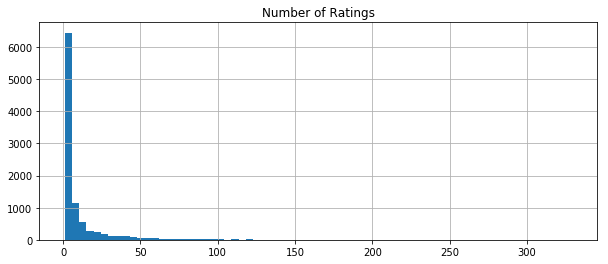

In [23]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)
plt.title('Number of Ratings')
plt.show()

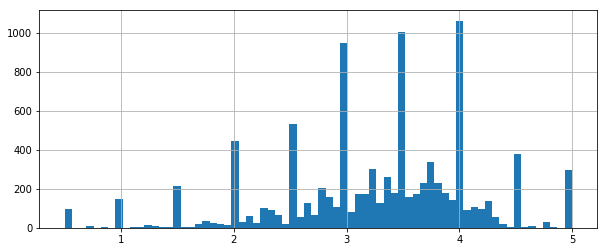

In [24]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

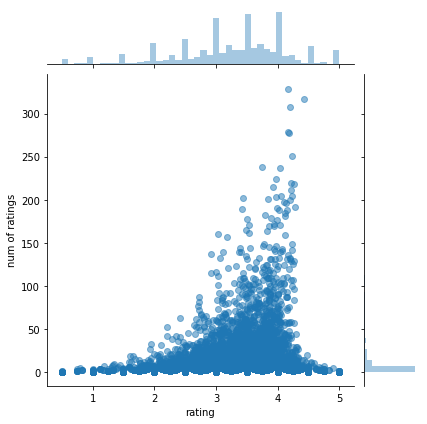

In [25]:
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.5)

So from splitting and joining the dataset, we want to be careful using the cold start method of recommending just the highest rated movies because they only have 1 or 2 ratings and instead need to ensure the highest rated movies have at least 20 ratings for the cold start.

In [26]:
highest_rated_movies = ratings.loc[(ratings['rating'] > 4.25) & (ratings['num of ratings'] > 20)]
highest_rated_movies

,rating,num of ratings
title,,
Cool Hand Luke (1967),4.271930,57
"Departed, The (2006)",4.252336,107
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041,97
Fight Club (1999),4.272936,218
"Godfather, The (1972)",4.289062,192
"Godfather: Part II, The (1974)",4.259690,129
Harold and Maude (1971),4.288462,26
Hoop Dreams (1994),4.293103,29
In the Name of the Father (1993),4.300000,25


In [27]:
ratings.loc[(ratings['num of ratings']==1)]

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Salem's Lot (2004),5.0,1
'Tis the Season for Love (2015),1.5,1
'night Mother (1986),3.0,1
...,...,...
Zoom (2006),2.5,1
Zoom (2015),2.5,1
Zulu (2013),1.5,1


So 3441 movies only have 1 rating.  This could skew the data, but since we are looking at comparing users to each other, this could also help some users find new content that they might not have considered.  The other thing to consider is how many movies a user has rated.  Since we are looking to have our model look for similar users, users with less ratings will also skew the data.

In [28]:
# Limit ratings to users that have rated more than 50 movies 
ratings_limited_users = ratings_df.groupby('userId').filter(lambda x: len(x) >= 50)

# List the movie titles that survive the filtering
movie_list_rating = ratings_limited_users.movieId.unique().tolist()

In [29]:
len(ratings_limited_users.movieId.unique())/len(movies_df.movieId.unique())*100

98.88113323752823

We kept 98% of the original movies.

In [30]:
len(ratings_limited_users.userId.unique())/len(ratings_df.userId.unique())*100

63.114754098360656

We kept only 63% of the original users.

In [31]:
# Export the new ratings dataframe with limited users
ratings_limited_users.to_csv('ratings_limited_users.csv')

## Determining the best model
Using surprise and trying both SVD and KNN algorithms to create and test models

In [32]:
# Initializing a reader and dataset class
reader = Reader()
data = Dataset.load_from_df(ratings_limited_users, reader)

In [33]:
# Splitting the data into train test sets
trainset, testset = train_test_split(data, test_size=.25)

In [34]:
# Checking to see which factors work best for SVD
param_grid = {'n_factors': [50,100,150], 
              'n_epochs':[20,30], 
              'lr_all':[0.005, 0.01],
              'reg_all':[0.02,0.1]}

In [35]:
# Running Gridsearch on SVD
gs = GridSearchCV(SVD, param_grid, measures = ['rmse', 'mae'], cv=3)

In [36]:
# Fitting the data for the Gridsearch
gs.fit(data)

In [37]:
# What are the results of gridsearch
print(gs.best_score)
print(gs.best_params)

{'rmse': 0.8569925147215963, 'mae': 0.6584739230596731}
{'rmse': {'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}, 'mae': {'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}}


In [38]:
# Defining the optimized svd
svdtuned = SVD(n_factors=100,
               n_epochs=30,
               lr_all=0.01, 
               reg_all=0.1)

In [39]:
svdtuned.fit(trainset)
svd_preds = svdtuned.test(testset)
accuracy.rmse(svd_preds)

RMSE: 0.8543


0.8542736951302147

In [40]:
# parameters for KNNBasic
knn_params = {'name': ['cosine', 'pearson'],'user_based':[True, False], 'min_support':[True, False]}

In [ ]:
# Gridsearching knnbasic to get the best params
gs_knn = GridSearchCV(KNNBasic, knn_params, measures=['rmse', 'mae'], cv=3)
gs_knn.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [ ]:
print(gs_knn.best_score)
print(gs_knn.best_params)

In [ ]:
# KNN Basic cross validation
knn_basic = KNNBasic(sim_options={'name': 'cosine','min_support':True, 'user_based': True})
knn_basic.fit(trainset)
knn_preds = knn_basic.test(testset)
accuracy.rmse(knn_preds)

In [ ]:
# Tuning KNN Baseline using parameters
gs_knnbase = GridSearchCV(KNNBaseline, knn_params, measures=['rmse', 'mae'], cv=3)
gs_knnbase.fit(data)

In [ ]:
# printing the results from the gridsearch
print(gs_knnbase.best_score)
print(gs_knnbase.best_params)

In [ ]:
# Runnning KNN baseline using best parameters from GridSearch
knn_baseline = KNNBaseline(sim_options={'name':'cosine', 'user_based': True, 'min_support': True})
knn_baseline.fit(trainset)
knnbase_preds = knn_baseline.test(testset)
accuracy.rmse(knnbase_preds)

Based on the metrics of RMSE and MAE the model that works the best is the SVD model with the tuned parameters found by using GridSearchCV.  We will use that in our recommendation system in the next notebook.